In [2]:
import numpy as np
import pandas as pd
import statsmodels.tsa as tsa
from statsmodels.tsa.vector_ar.var_model import VAR, FEVD
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import acf, adfuller, ccf, ccovf, kpss
from statsmodels.graphics.tsaplots import plot_acf
import matplotlib.pyplot as plt
#import mvts_utils as utils
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

%load_ext autoreload
%autoreload 2

# Load in the data

In [3]:
aq_df = pd.read_excel("../../data/air+quality/AirQualityUCI.xlsx", parse_dates=[['Date', 'Time']])\
            .set_index('Date_Time').replace(-200, np.nan).interpolate()
aq_df.head(2)

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
Date_Time,,,,,,,,,,,,,
2004-03-10 18:00:00,2.6,1360.00,150.0,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754
2004-03-10 19:00:00,2.0,1292.25,112.0,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487


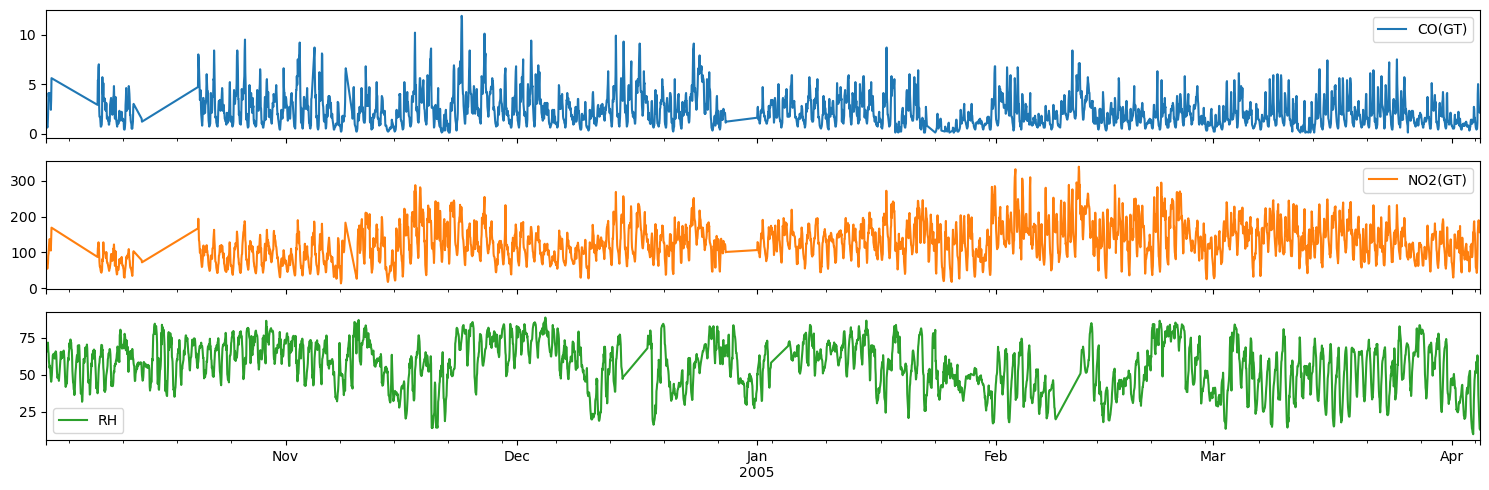

In [5]:
cols = ['CO(GT)', 'NO2(GT)', 'RH']
data_df = aq_df.loc[aq_df.index>'2004-10-01',cols]
fig,ax = plt.subplots(3, figsize=(15,5), sharex=True)
data_df.plot(ax=ax, subplots=True)
plt.xlabel('')
plt.tight_layout()
plt.show()

In [8]:
sample_df

,CO(GT),NO2(GT),RH
Date_Time,,,
2005-03-31 11:00:00,1.20,117.9,36.924999
2005-03-31 12:00:00,1.20,107.9,32.950001
2005-03-31 13:00:00,1.20,100.1,30.325000
2005-03-31 14:00:00,0.90,90.6,33.225000
2005-03-31 15:00:00,1.00,89.4,32.925000
2005-03-31 16:00:00,1.10,101.7,33.850000
2005-03-31 17:00:00,1.50,113.8,36.424999
2005-03-31 18:00:00,2.10,124.0,38.925000
2005-03-31 19:00:00,2.10,136.2,45.174999


# Check if the variables are correlated at different time lags

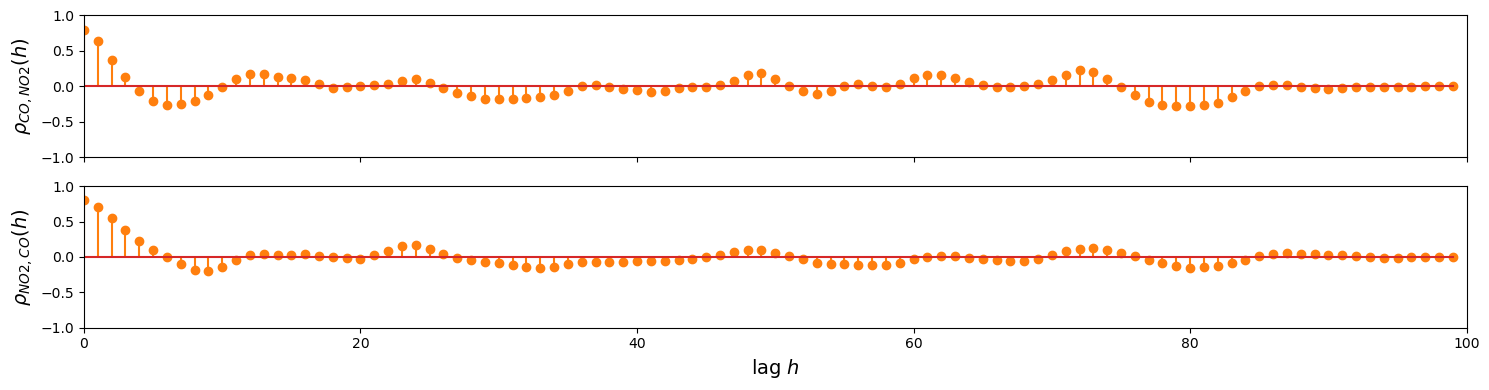

In [6]:
sample_df = data_df.iloc[-100:]
ccf_y1_y2 = ccf(sample_df['CO(GT)'], sample_df['NO2(GT)'], unbiased=False)
ccf_y2_y1 = ccf(sample_df['NO2(GT)'], sample_df['CO(GT)'], unbiased=False)

fig, ax = plt.subplots(2, figsize=(15, 4), sharex=True, sharey=True)
d=1
ax[0].stem(np.arange(len(sample_df))[::d], ccf_y1_y2[::d], linefmt='C1-', markerfmt='C1o')
ax[1].stem(np.arange(len(sample_df))[::d], ccf_y2_y1[::d], linefmt='C1-', markerfmt='C1o')
ax[-1].set_ylim(-1, 1)
ax[0].set_xlim(0, 100)
ax[-1].set_xlabel('lag $h$', fontsize=14)
ax[0].set_ylabel(r'$\rho_{CO,NO2} (h)$', fontsize=14)
ax[1].set_ylabel(r'$\rho_{NO2,CO} (h)$', fontsize=14)
plt.tight_layout()
plt.show()

# Test for stationarity

### KPSS test

In [9]:
test_stat, p_val = [], []
cv_1pct, cv_2p5pct, cv_5pct, cv_10pct = [], [], [], []
for c in data_df.columns: 
    kpss_res = kpss(data_df[c].dropna(), regression='ct')
    test_stat.append(kpss_res[0])
    p_val.append(kpss_res[1])
    cv_1pct.append(kpss_res[3]['1%'])
    cv_2p5pct.append(kpss_res[3]['1%'])
    cv_5pct.append(kpss_res[3]['5%'])
    cv_10pct.append(kpss_res[3]['10%'])
kpss_res_df = pd.DataFrame({'Test statistic': test_stat, 
                           'p-value': p_val, 
                           'Critical value - 1%': cv_1pct,
                           'Critical value - 2.5%': cv_2p5pct,
                           'Critical value - 5%': cv_5pct,
                           'Critical value - 10%': cv_10pct}, 
                         index=data_df.columns).T
kpss_res_df.round(4)

,CO(GT),NO2(GT),RH
Test statistic,0.0689,0.3172,0.1026
p-value,0.1000,0.0100,0.1000
Critical value - 1%,0.2160,0.2160,0.2160
Critical value - 2.5%,0.2160,0.2160,0.2160
Critical value - 5%,0.1460,0.1460,0.1460
Critical value - 10%,0.1190,0.1190,0.1190


### Dickey fuller test

In [10]:
test_stat, p_val = [], []
cv_1pct, cv_5pct, cv_10pct = [], [], []
for c in data_df.columns: 
    adf_res = adfuller(data_df[c].dropna())
    test_stat.append(adf_res[0])
    p_val.append(adf_res[1])
    cv_1pct.append(adf_res[4]['1%'])
    cv_5pct.append(adf_res[4]['5%'])
    cv_10pct.append(adf_res[4]['10%'])
adf_res_df = pd.DataFrame({'Test statistic': test_stat, 
                           'p-value': p_val, 
                           'Critical value - 1%': cv_1pct,
                           'Critical value - 5%': cv_5pct,
                           'Critical value - 10%': cv_10pct}, 
                         index=data_df.columns).T
adf_res_df.round(4)

,CO(GT),NO2(GT),RH
Test statistic,-7.0195,-6.7695,-6.8484
p-value,0.0000,0.0000,0.0000
Critical value - 1%,-3.4318,-3.4318,-3.4318
Critical value - 5%,-2.8622,-2.8622,-2.8622
Critical value - 10%,-2.5671,-2.5671,-2.5671


# Split data in train and test sets

In [11]:
forecast_length = 24 
train_df, test_df = data_df.iloc[:-forecast_length], data_df.iloc[-forecast_length:]
test_df = test_df.filter(test_df.columns[~test_df.columns.str.contains('-d')])

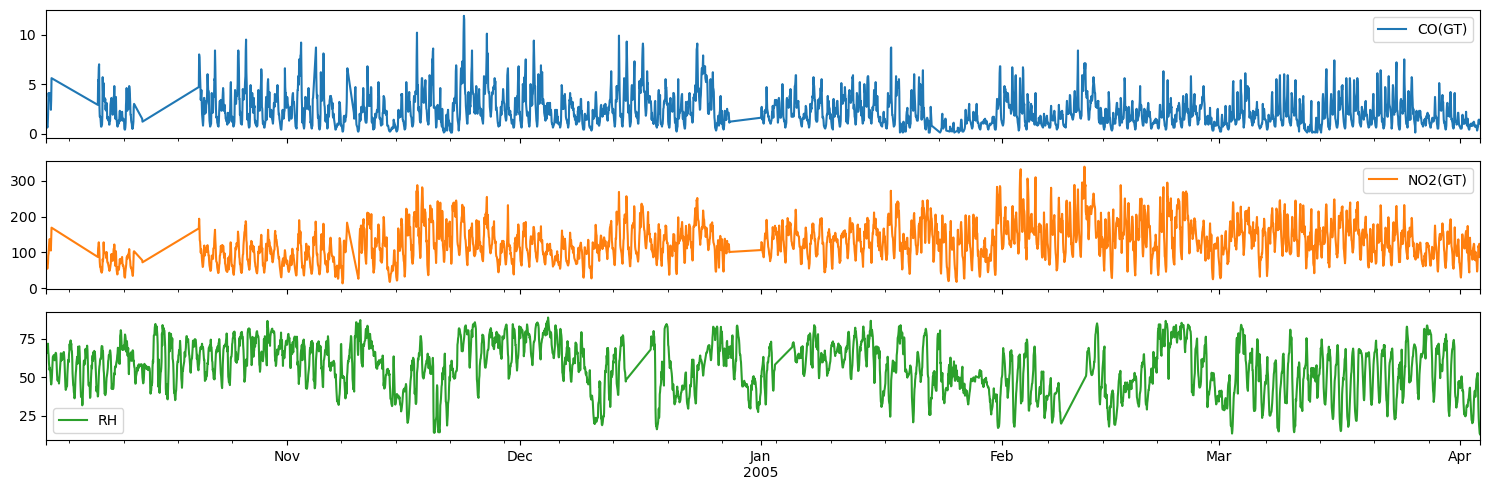

In [12]:
fig,ax = plt.subplots(3, figsize=(15, 5), sharex=True)
train_df.plot(ax=ax, subplots=True)
plt.xlabel('')
plt.tight_layout()
plt.show()

# Find the best number of lags

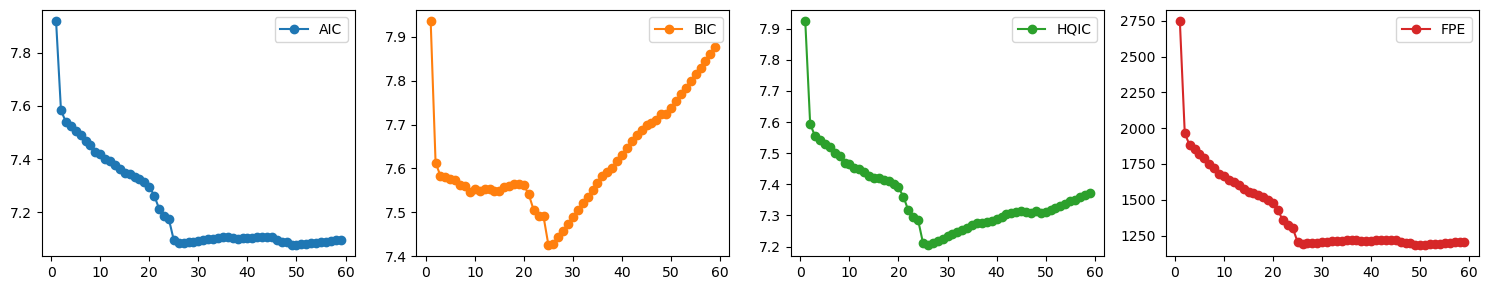

In [13]:
aic, bic, fpe, hqic = [], [], [], []
model = VAR(train_df) 
p = np.arange(1,60)
for i in p:
    result = model.fit(i)
    aic.append(result.aic)
    bic.append(result.bic)
    fpe.append(result.fpe)
    hqic.append(result.hqic)
lags_metrics_df = pd.DataFrame({'AIC': aic, 
                                'BIC': bic, 
                                'HQIC': hqic,
                                'FPE': fpe}, 
                               index=p)    
fig, ax = plt.subplots(1, 4, figsize=(15, 3), sharex=True)
lags_metrics_df.plot(subplots=True, ax=ax, marker='o')
plt.tight_layout()

# Train and fit the model

In [17]:
%%time
model = VAR(train_df) 
var_model = model.fit(26)
var_model.summary()

CPU times: user 671 ms, sys: 4.16 ms, total: 675 ms
Wall time: 84.9 ms


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 24, Jul, 2024
Time:                     11:09:17
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    7.42717
Nobs:                     4404.00    HQIC:                   7.20458
Log likelihood:          -34107.4    FPE:                    1191.88
AIC:                      7.08328    Det(Omega_mle):         1129.97
--------------------------------------------------------------------
Results for equation CO(GT)
                 coefficient       std. error           t-stat            prob
------------------------------------------------------------------------------
const               0.241332         0.069966            3.449           0.001
L1.CO(GT)           0.961418         0.019229           49.999           0.000
L1.NO2(GT)          0.001992         0.000713            2.794     

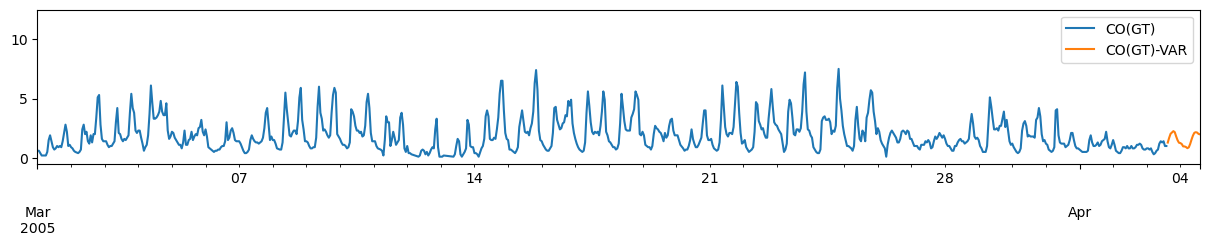

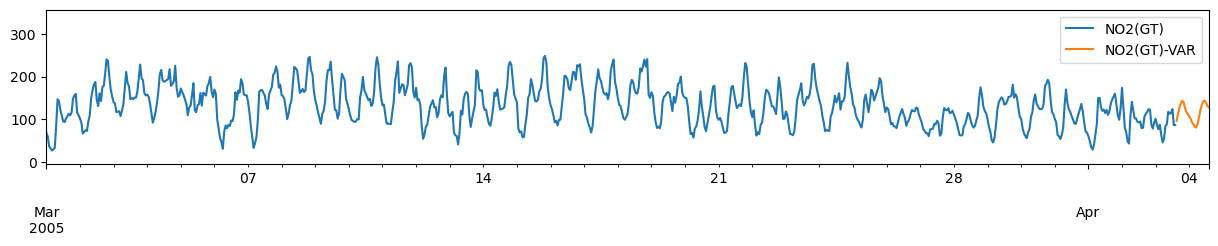

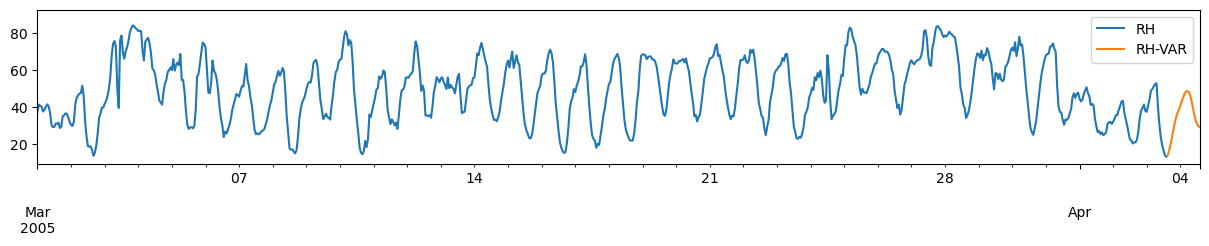

In [15]:
forecast_var = pd.DataFrame(var_model.forecast(train_df.values, 
                                              steps=forecast_length), 
                           columns=train_df.columns, 
                           index=test_df.index)
forecast_var = forecast_var.rename(columns={c: c+'-VAR' for c in forecast_var.columns})
for c in train_df.columns:
    fig, ax = plt.subplots(figsize=[15, 2])
    pd.concat([train_df[[c]], forecast_var[[c+'-VAR']]], axis=1).plot(ax=ax)
    plt.xlim(left=pd.to_datetime('2005-03-01'))
    plt.xlabel('')
#     plt.tight_layout()
    plt.show()